# EDA

In [91]:
import os
import joblib
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [92]:
df = pd.read_csv("../data/credit_risk_dataset.csv")
df_raw = pd.read_csv("../data/credit_risk_dataset.csv")
print(df.head())
df.head


   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  


<bound method NDFrame.head of        person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt 

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [94]:
print("\nChecking for missing values in each column:")
df.isnull().sum()   


Checking for missing values in each column:


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [95]:
df["loan_status"].value_counts(normalize=True)


loan_status
0    0.781836
1    0.218164
Name: proportion, dtype: float64

In [96]:
num_cols = ["person_age","person_income","person_emp_length","loan_amnt","loan_int_rate","loan_percent_income","cb_person_cred_hist_length"]
df[num_cols].describe().T
df[num_cols].quantile([0.01, 0.99]).T  # lihat ekor distribusi

,0.01,0.99
person_age,21.00,50.00
person_income,14400.00,225200.00
person_emp_length,0.00,18.00
loan_amnt,1000.00,29800.00
loan_int_rate,5.42,18.62
loan_percent_income,0.02,0.50
cb_person_cred_hist_length,2.00,17.00


In [97]:
df.describe()


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [98]:
for col in df.select_dtypes(include="object"):
    print(col, ":", df[col].unique())

person_home_ownership : ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
loan_intent : ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
loan_grade : ['D' 'B' 'C' 'A' 'E' 'F' 'G']
cb_person_default_on_file : ['Y' 'N']


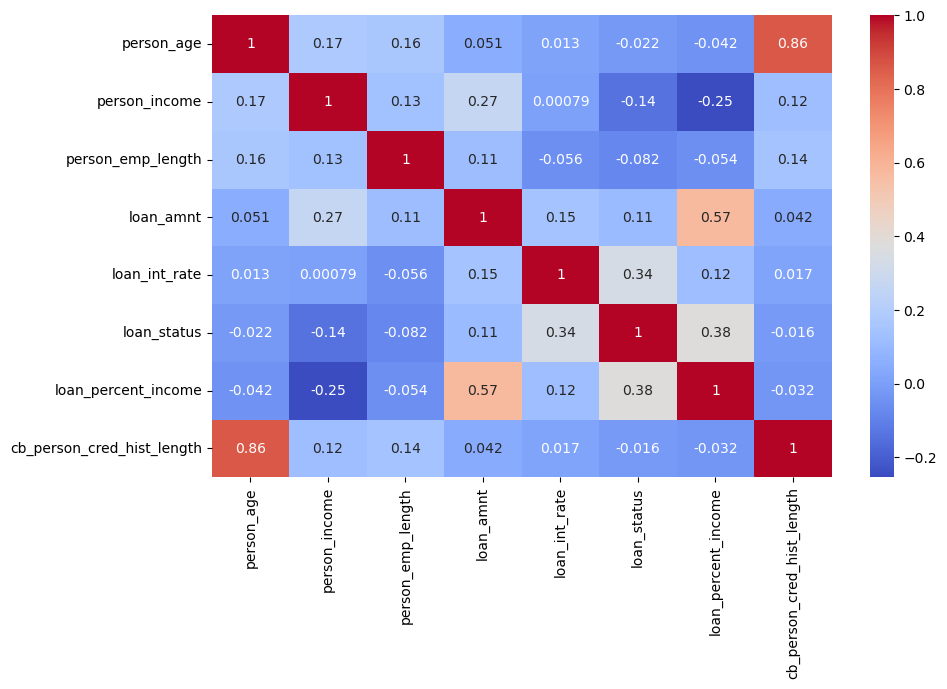

In [99]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.show()

# Preprocessing


In [100]:
df["person_emp_length"].fillna(df["person_emp_length"].median(), inplace=True)
df["loan_int_rate"].fillna(df["loan_int_rate"].median(), inplace=True)

df.isnull().sum()

C:\Users\ROG\AppData\Local\Temp\ipykernel_10572\2060950958.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["person_emp_length"].fillna(df["person_emp_length"].median(), inplace=True)
C:\Users\ROG\AppData\Local\Temp\ipykernel_10572\2060950958.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [101]:
df["cb_person_default_on_file"] = df["cb_person_default_on_file"].map({"N": 0, "Y": 1})
numeric_cols = ["person_age","person_income","person_emp_length",
                "loan_amnt","loan_int_rate","loan_percent_income",
                "cb_person_cred_hist_length","cb_person_default_on_file"]

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

count    3.258100e+04
mean     6.607485e+04
std      6.198312e+04
min      4.000000e+03
25%      3.850000e+04
50%      5.500000e+04
75%      7.920000e+04
max      6.000000e+06
Name: person_income, dtype: float64
count    32581.000000
mean         0.170203
std          0.106782
min          0.000000
25%          0.090000
50%          0.150000
75%          0.230000
max          0.830000
Name: loan_percent_income, dtype: float64


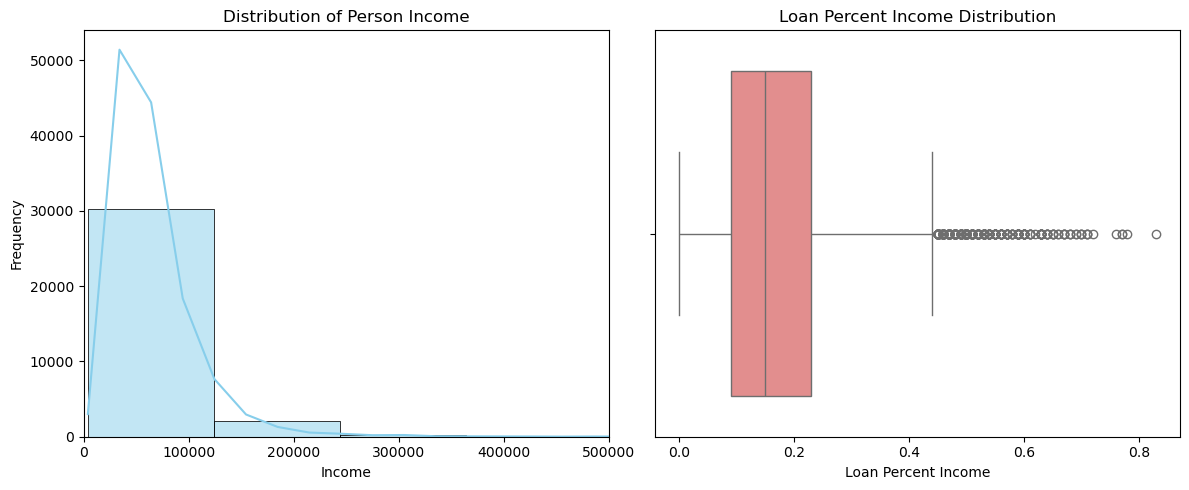

In [ ]:
print(df["person_income"].describe())
print(df["loan_percent_income"].describe())
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df["person_income"], bins=50, kde=True, color="skyblue")
plt.title("Distribution of Person Income")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.xlim(0, 500000)  

plt.subplot(1,2,2)
sns.boxplot(x=df["loan_percent_income"], color="lightcoral")
plt.title("Loan Percent Income Distribution")
plt.xlabel("Loan Percent Income")

plt.tight_layout()
plt.show()

C:\Users\ROG\AppData\Local\Temp\ipykernel_10572\1014730613.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '225200.00000000073' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["person_income"] > upper_limit, "person_income"] = upper_limit


count     32581.000000
mean      64335.810626
std       37806.237543
min        4000.000000
25%       38500.000000
50%       55000.000000
75%       79200.000000
max      225200.000000
Name: person_income, dtype: float64
count    32581.000000
mean         0.169692
std          0.104891
min          0.000000
25%          0.090000
50%          0.150000
75%          0.230000
max          0.500000
Name: loan_percent_income, dtype: float64


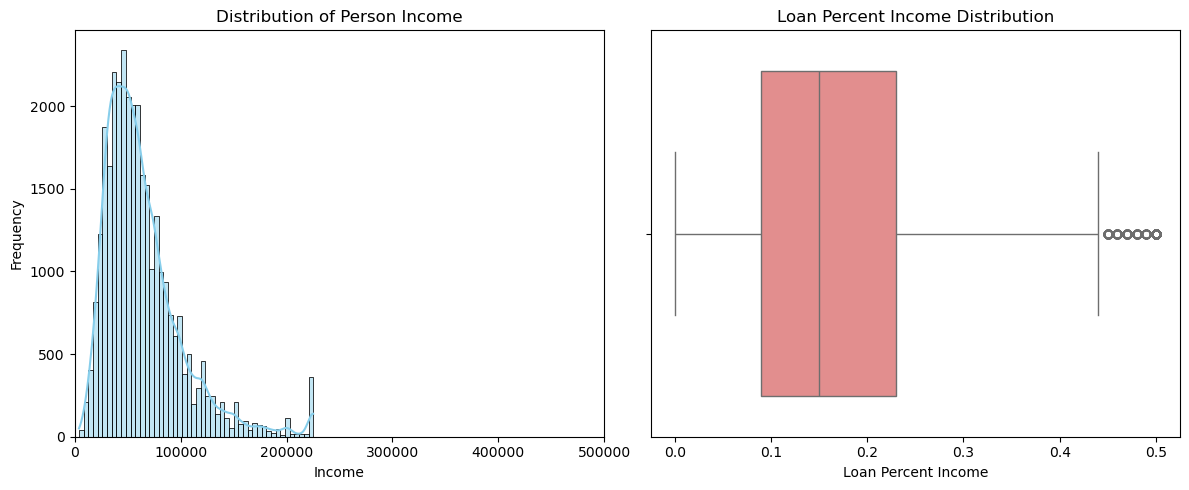

In [103]:
upper_limit = df["person_income"].quantile(0.99)
df.loc[df["person_income"] > upper_limit, "person_income"] = upper_limit

upper_limit = df["loan_percent_income"].quantile(0.99)
df.loc[df["loan_percent_income"] > upper_limit, "loan_percent_income"] = upper_limit

print(df["person_income"].describe())
print(df["loan_percent_income"].describe())

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df["person_income"], bins=50, kde=True, color="skyblue")
plt.title("Distribution of Person Income")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.xlim(0, 500000)  

plt.subplot(1,2,2)
sns.boxplot(x=df["loan_percent_income"], color="lightcoral")
plt.title("Loan Percent Income Distribution")
plt.xlabel("Loan Percent Income")

plt.tight_layout()
plt.show()


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  float64
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  int64  
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 3.0+ MB


In [105]:
print("Sebelum:", df_raw["person_income"].describe())
print("Sesudah:", df["person_income"].describe())


Sebelum: count    3.258100e+04
mean     6.607485e+04
std      6.198312e+04
min      4.000000e+03
25%      3.850000e+04
50%      5.500000e+04
75%      7.920000e+04
max      6.000000e+06
Name: person_income, dtype: float64
Sesudah: count     32581.000000
mean      64335.810626
std       37806.237543
min        4000.000000
25%       38500.000000
50%       55000.000000
75%       79200.000000
max      225200.000000
Name: person_income, dtype: float64


In [106]:
X = df.drop(columns=["loan_status"])
y = df["loan_status"]

num_cols = ["person_age","person_income","person_emp_length",
            "loan_amnt","loan_int_rate","loan_percent_income",
            "cb_person_cred_hist_length"]
cat_cols = ["person_home_ownership","loan_intent","loan_grade","cb_person_default_on_file"]

numeric_tf = Pipeline([("imputer", SimpleImputer(strategy="median")),
                       ("scaler", StandardScaler())])
categorical_tf = Pipeline([("imputer", SimpleImputer(strategy="most_frequent")),
                           ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))])

pre = ColumnTransformer([("num", numeric_tf, num_cols),
                         ("cat", categorical_tf, cat_cols)])

In [107]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, stratify=y_train_full, random_state=42
)

# Modeling

In [108]:
log_reg = Pipeline([
    ("preprocessor", pre),
    ("classifier", LogisticRegression(
        C=1.0,  
        max_iter=1000,
        random_state=42,
        class_weight='balanced'  
    ))
])

log_reg.fit(X_train, y_train)

y_train_pred_lr = log_reg.predict(X_train)
y_val_pred_lr = log_reg.predict(X_val)
y_test_pred_lr = log_reg.predict(X_test)

train_acc_lr = accuracy_score(y_train, y_train_pred_lr)
val_acc_lr = accuracy_score(y_val, y_val_pred_lr)
test_acc_lr = accuracy_score(y_test, y_test_pred_lr)

print(f"Training Accuracy:   {train_acc_lr:.4f}")
print(f"Validation Accuracy: {val_acc_lr:.4f}")
print(f"Test Accuracy:       {test_acc_lr:.4f}")
print(f"Overfitting Check:   {train_acc_lr - val_acc_lr:.4f}")
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred_lr))

Training Accuracy:   0.8108
Validation Accuracy: 0.8086
Test Accuracy:       0.8140
Overfitting Check:   0.0023

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      5095
           1       0.55      0.78      0.65      1422

    accuracy                           0.81      6517
   macro avg       0.74      0.80      0.76      6517
weighted avg       0.85      0.81      0.82      6517



In [109]:
rf_model = Pipeline([
    ("preprocessor", pre),
    ("classifier", RandomForestClassifier(
        n_estimators=100,
        max_depth=10,  
        min_samples_split=20,  
        min_samples_leaf=10,  
        max_features='sqrt',  
        random_state=42,
        class_weight='balanced',
        n_jobs=-1
    ))
])

rf_model.fit(X_train, y_train)

y_train_pred_rf = rf_model.predict(X_train)
y_val_pred_rf = rf_model.predict(X_val)
y_test_pred_rf = rf_model.predict(X_test)

train_acc_rf = accuracy_score(y_train, y_train_pred_rf)
val_acc_rf = accuracy_score(y_val, y_val_pred_rf)
test_acc_rf = accuracy_score(y_test, y_test_pred_rf)

print(f"Training Accuracy:   {train_acc_rf:.4f}")
print(f"Validation Accuracy: {val_acc_rf:.4f}")
print(f"Test Accuracy:       {test_acc_rf:.4f}")
print(f"Overfitting Check:   {train_acc_rf - val_acc_rf:.4f}")
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred_rf))

Training Accuracy:   0.9118
Validation Accuracy: 0.8976
Test Accuracy:       0.9021
Overfitting Check:   0.0142

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      5095
           1       0.79      0.76      0.77      1422

    accuracy                           0.90      6517
   macro avg       0.86      0.85      0.85      6517
weighted avg       0.90      0.90      0.90      6517



In [110]:
xgb_model = Pipeline([
    ("preprocessor", pre),
    ("classifier", XGBClassifier(
        n_estimators=100,
        max_depth=6,  
        learning_rate=0.1, 
        subsample=0.8,  
        colsample_bytree=0.8,  
        reg_alpha=0.1,  
        reg_lambda=1.0,  
        random_state=42,
        eval_metric='logloss',
        use_label_encoder=False
    ))
])

xgb_model.fit(X_train, y_train)

y_train_pred_xgb = xgb_model.predict(X_train)
y_val_pred_xgb = xgb_model.predict(X_val)
y_test_pred_xgb = xgb_model.predict(X_test)

train_acc_xgb = accuracy_score(y_train, y_train_pred_xgb)
val_acc_xgb = accuracy_score(y_val, y_val_pred_xgb)
test_acc_xgb = accuracy_score(y_test, y_test_pred_xgb)

print(f"Training Accuracy:   {train_acc_xgb:.4f}")
print(f"Validation Accuracy: {val_acc_xgb:.4f}")
print(f"Test Accuracy:       {test_acc_xgb:.4f}")
print(f"Overfitting Check:   {train_acc_xgb - val_acc_xgb:.4f}")
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred_xgb))

c:\Users\ROG\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:41:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training Accuracy:   0.9422
Validation Accuracy: 0.9309
Test Accuracy:       0.9346
Overfitting Check:   0.0113

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5095
           1       0.97      0.72      0.83      1422

    accuracy                           0.93      6517
   macro avg       0.95      0.86      0.89      6517
weighted avg       0.94      0.93      0.93      6517



# Evaluation

In [111]:
print("MODEL COMPARISON SUMMARY\n")

results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Train Accuracy': [train_acc_lr, train_acc_rf, train_acc_xgb],
    'Validation Accuracy': [val_acc_lr, val_acc_rf, val_acc_xgb],
    'Test Accuracy': [test_acc_lr, test_acc_rf, test_acc_xgb],
    'Overfitting Gap': [
        train_acc_lr - val_acc_lr,
        train_acc_rf - val_acc_rf,
        train_acc_xgb - val_acc_xgb
    ]
})

print(results_df.to_string(index=False))


# Tentukan model terbaik
best_model_idx = results_df['Test Accuracy'].idxmax()
best_model_name = results_df.loc[best_model_idx, 'Model']
best_test_acc = results_df.loc[best_model_idx, 'Test Accuracy']

print(f"\nBest Model: {best_model_name} with Test Accuracy: {best_test_acc:.4f}")

# Check overfitting untuk semua model
if (results_df['Overfitting Gap'] < 0.05).all():
    print("All models show good generalization (no significant overfitting)")
else:
    overfitting_models = results_df[results_df['Overfitting Gap'] >= 0.05]['Model'].tolist()
    print(f"Potential overfitting detected in: {', '.join(overfitting_models)}")

MODEL COMPARISON SUMMARY

              Model  Train Accuracy  Validation Accuracy  Test Accuracy  Overfitting Gap
Logistic Regression        0.810848             0.808556       0.814025         0.002293
      Random Forest        0.911803             0.897564       0.902102         0.014239
            XGBoost        0.942209             0.930942       0.934632         0.011267

Best Model: XGBoost with Test Accuracy: 0.9346
All models show good generalization (no significant overfitting)


# Save model

In [112]:
current_dir = os.getcwd()                  
BASE_DIR = os.path.dirname(current_dir)    
MODELS_DIR = os.path.join(BASE_DIR, "models")

os.makedirs(MODELS_DIR, exist_ok=True)
print(f"Menyimpan model ke folder: {MODELS_DIR}")

try:
    joblib.dump(xgb_model, os.path.join(MODELS_DIR, 'xgb_credit_risk_model.pkl'))
    print("✅ Model disimpan: xgb_credit_risk_model.pkl")

    joblib.dump(pre, os.path.join(MODELS_DIR, 'preprocessor.pkl'))
    print("✅ Preprocessor disimpan: preprocessor.pkl")

    model_metadata = {
        'feature_names_original': X_train.columns.tolist() if 'X_train' in locals() else [],
        'categorical_features': ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'],
        'numerical_features': ['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
                              'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'],
        'target_classes': ['Non-Default', 'Default'],
        'model_type': 'XGBoost'
    }

    with open(os.path.join(MODELS_DIR, 'model_metadata.pkl'), 'wb') as f:
        pickle.dump(model_metadata, f)
    print("✅ Metadata disimpan: model_metadata.pkl")

    print("\n📁 File yang disimpan di folder 'models/':")
    for file in os.listdir(MODELS_DIR):
        print(f"   - {file}")

except Exception as e:
    print(f"❌ Error menyimpan model: {e}")


Menyimpan model ke folder: c:\Users\ROG\OneDrive - Bina Nusantara\Desktop\Nugas\Semester 3\Machine Learning\UTS MLOps\creditRiskPredictor\models
✅ Model disimpan: xgb_credit_risk_model.pkl
✅ Preprocessor disimpan: preprocessor.pkl
✅ Metadata disimpan: model_metadata.pkl

📁 File yang disimpan di folder 'models/':
   - model_metadata.pkl
   - preprocessor.pkl
   - xgb_credit_risk_model.pkl
